In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from typing import List

In [2]:
file_path: str = r"D:\Obfuscation\data\datasets\TOKENIZER_DATASET_UPDATED.csv"
df = pd.read_csv(file_path, sep=';')

In [3]:
def scale_data(scaler, X) -> None:
    X_scaled = scaler.fit_transform(X)
    return scaler, X_scaled

In [4]:
def show_pca(X_scaled, components: float, svd_solver: str = 'full') -> None:
    pca = PCA(n_components=components, svd_solver=svd_solver)
    pca_X = pca.fit_transform(X_scaled)
    
    plt.rcParams["figure.figsize"] = (14, 10)

    fig, ax = plt.subplots()
    xi = np.arange(pca_X.shape[1])
    y = np.cumsum(pca.explained_variance_ratio_)

    plt.ylim(0.0, 1.1)
    plt.plot(xi, y, marker='o', linestyle='--', color='b')

    plt.xlabel('Number of Components')
    plt.xticks(np.arange(0, pca_X.shape[1], step=20))
    plt.ylabel('Cumulative variance (%)')
    plt.title('The number of components needed to explain variance')

    plt.axhline(y=components, color='r', linestyle='-')
    plt.text(0.5, 0.85, f'{components * 100}% cut-off threshold', color = 'red', fontsize=16)

    ax.grid(axis='x')
    plt.show()
    
    return pca_X

In [5]:
def proccess_PCA(X_scaled, n_components: List[float]) -> List:    
    pca_data: List = []
    for components in n_components:
        pca_X = show_pca(X_scaled.copy(), components)
        pca_data.append(pca_X)
    return pca_data

In [6]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]
scaler = MinMaxScaler()
scaler, X_scaled = scale_data(scaler, X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [7]:
n_component_proportions: List[float] = [
    0.95,
    0.99,
]

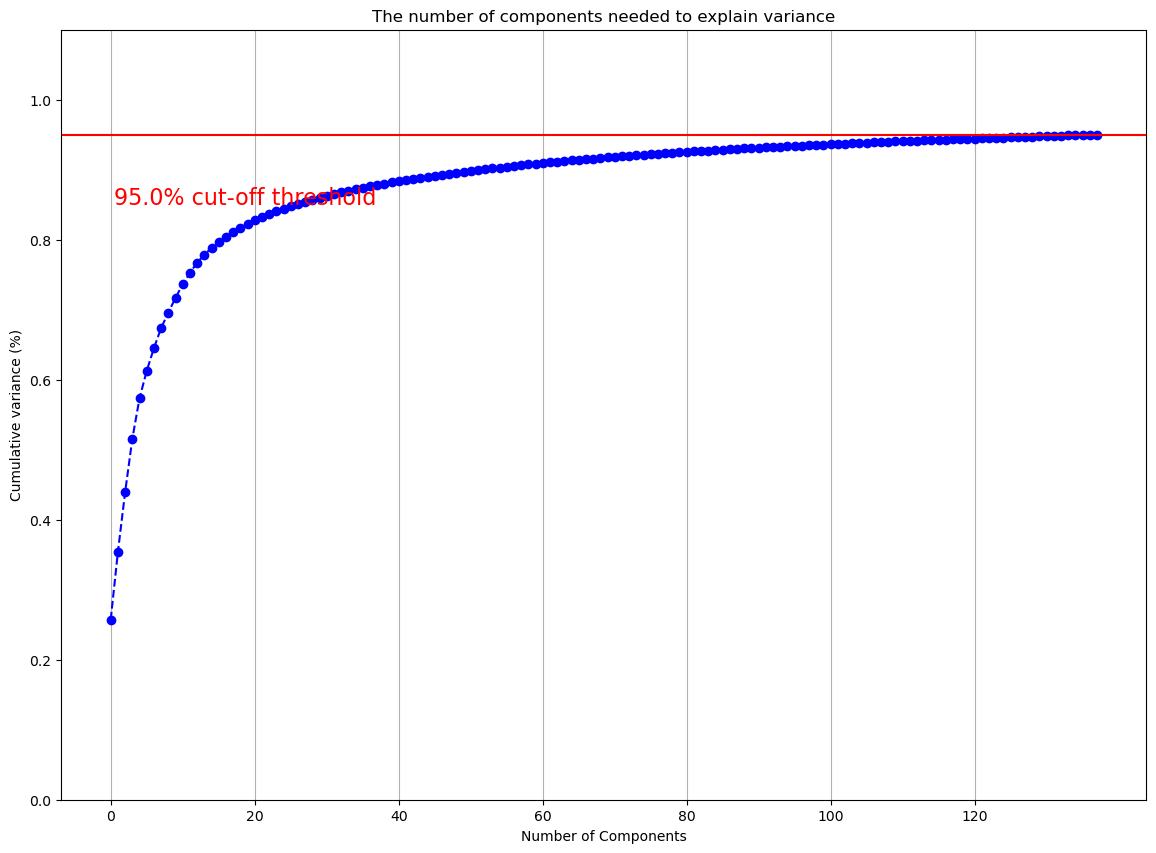

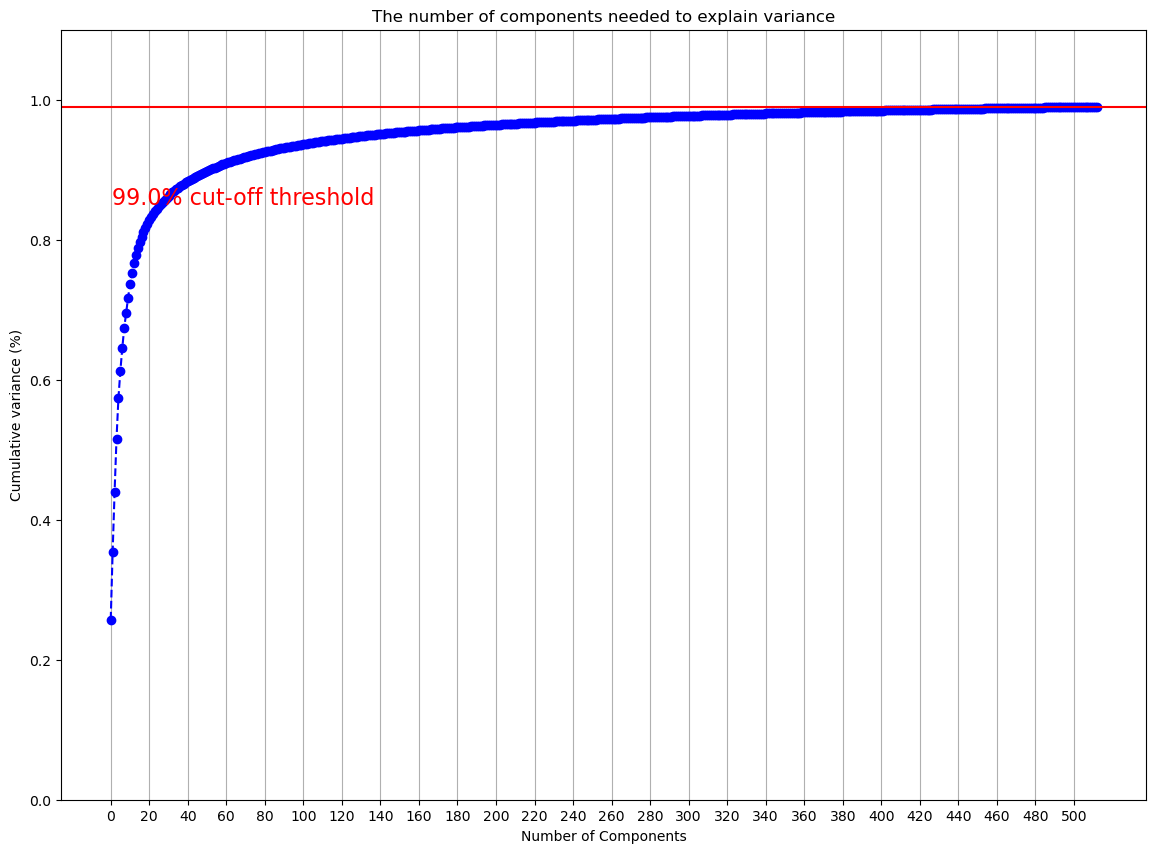

In [8]:
pca_data = proccess_PCA(X_scaled, n_component_proportions)

In [9]:
for pca_X in pca_data:
    print(pca_X.shape)

(29730, 138)
(29730, 513)
